In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense1 = nn.Linear(4, 64)
        self.dense2 = nn.Linear(64, 2)

        nn.init.zeros_(self.dense1.bias)
        nn.init.zeros_(self.dense2.bias)
        
        nn.init.kaiming_normal_(self.dense1.weight, nonlinearity='relu')
        with torch.no_grad():
            self.dense2.weight *= 0.1

    def forward(self, x):
        x = F.relu(self.dense1(x))
        x = F.softmax(self.dense2(x), dim=1)
        return x

In [ ]:
from trainer import Reinforce
import gymnasium as gym

EPISODES = 4000

env = gym.make("CartPole-v1", render_mode="rgb_array")

policy = Model()
optimizer = torch.optim.Adam(policy.parameters(), lr=1e-3)

reinforce = Reinforce(env, policy, optimizer, discount=0.99)
rewards, losses = reinforce.train(episodes=EPISODES, stats_interval=500)


New max of 12.0 in episode 1
New max of 32.0 in episode 2
New max of 36.0 in episode 16
New max of 42.0 in episode 18
New max of 50.0 in episode 20
New max of 67.0 in episode 47
New max of 73.0 in episode 67
New max of 105.0 in episode 73
New max of 110.0 in episode 85
New max of 120.0 in episode 106
New max of 180.0 in episode 126
New max of 221.0 in episode 192
New max of 266.0 in episode 229
New max of 290.0 in episode 256
New max of 457.0 in episode 282
New max of 473.0 in episode 425
New max of 500.0 in episode 444
Episodes (0, 499): Avg Loss- -1.155370216101408 Avg Reward- 120.592
Episodes (500, 999): Avg Loss- -2.9319246000945567 Avg Reward- 307.576
Episodes (1000, 1499): Avg Loss- -3.3833026700019837 Avg Reward- 411.01
Episodes (1500, 1999): Avg Loss- -2.1330883936583995 Avg Reward- 417.994
Episodes (2000, 2499): Avg Loss- -2.2627230049967766 Avg Reward- 440.426
Episodes (2500, 2999): Avg Loss- -2.006108199477196 Avg Reward- 431.914
Episodes (3000, 3499): Avg Loss- -2.224769003

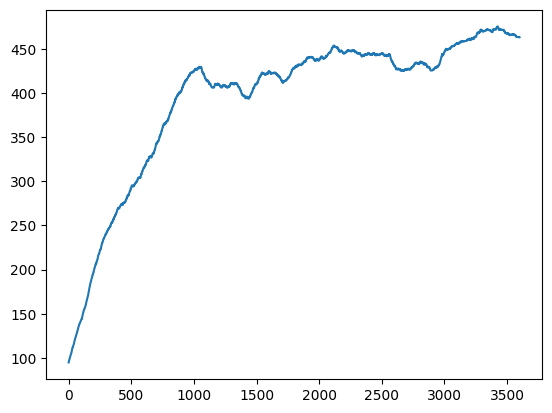

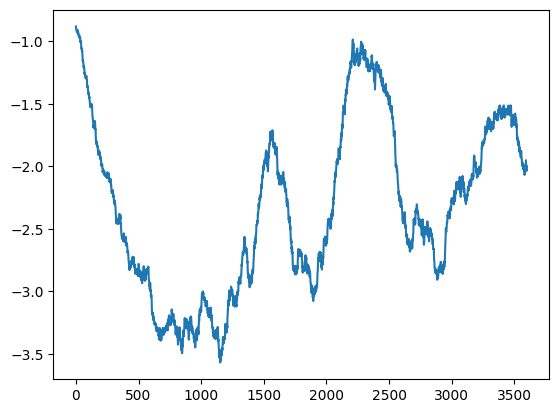

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')

plt.figure()
plt.plot(moving_average(rewards, int(EPISODES/10)))
plt.figure()
plt.plot(moving_average(losses, int(EPISODES/10)))

In [5]:
from IPython.display import HTML

HTML(reinforce.playback())

/Users/varun/Documents/venvs/3.12/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


Playback Return: 500.0


In [5]:
reinforce.eval(episodes=500)

Average Return over 500 episodes: 500.0


In [6]:
reinforce.save("models/cart_pole/REINFORCE_500")